# **Shill Bidding Dataset**

----

### **BUSINESS PROBLEM**

The business problem in this scenario is identifying and preventing shill bidding in online auctions where fraudulent bids inflate item prices, causing buyers to overpay. Detecting this behavior in real time is essential to maintaining fairness and trust on auction platforms. Predictive models can help flag and stop these activities before they negatively impact honest buyers.

This issue affects both buyers and auction platforms. Financially, preventing shill bidding can save users from losses and safeguard the platform long term growth. Socially, it fosters an environment of trust and fairness which is crucial for retaining users in competitive online market.


### **EXPLORATORY DATA ANALYSIS**

In [ ]:
import pandas as pd
import csv

Bidding = pd.read_csv('Shill_Bidding_Dataset.csv')
Bidding.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [ ]:
Bidding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [ ]:
Bidding.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

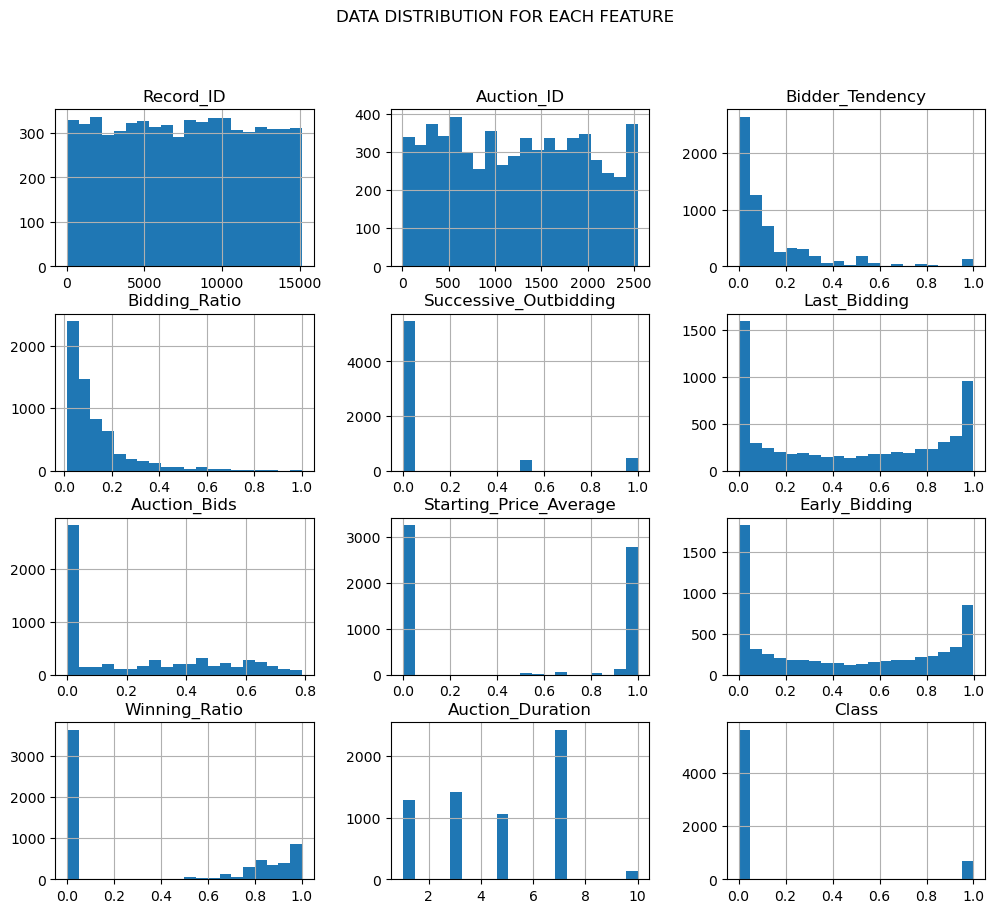

In [ ]:
Bidding.hist(figsize=(12, 10), bins=20)
plt.suptitle('DATA DISTRIBUTION FOR EACH FEATURE')

plt.show()

### **Target variable:**

<Axes: title={'center': 'DISTRIBUTION OF TARGET VARIABLE "CLASS"'}>

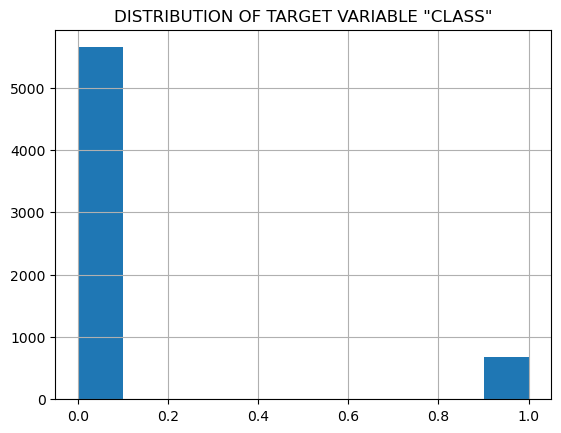

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('DISTRIBUTION OF TARGET VARIABLE "CLASS"')
Bidding.Class.hist()

### **Missing values:**

In [ ]:
print("Missing values in each column:")

print(Bidding.isnull().sum())

Missing values in each column:
Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64


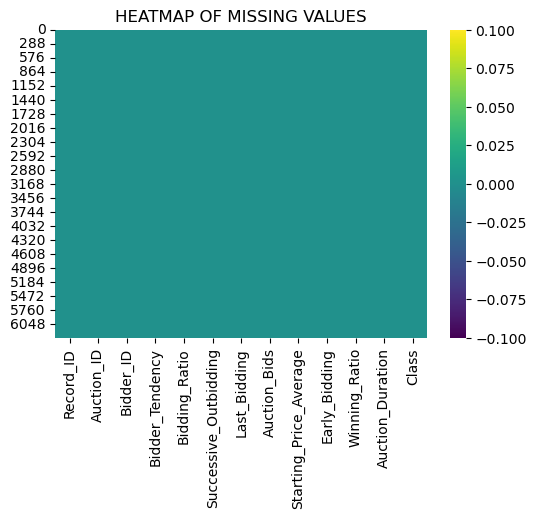

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(Bidding.isnull(), cbar=True, cmap='viridis')

plt.title("HEATMAP OF MISSING VALUES")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

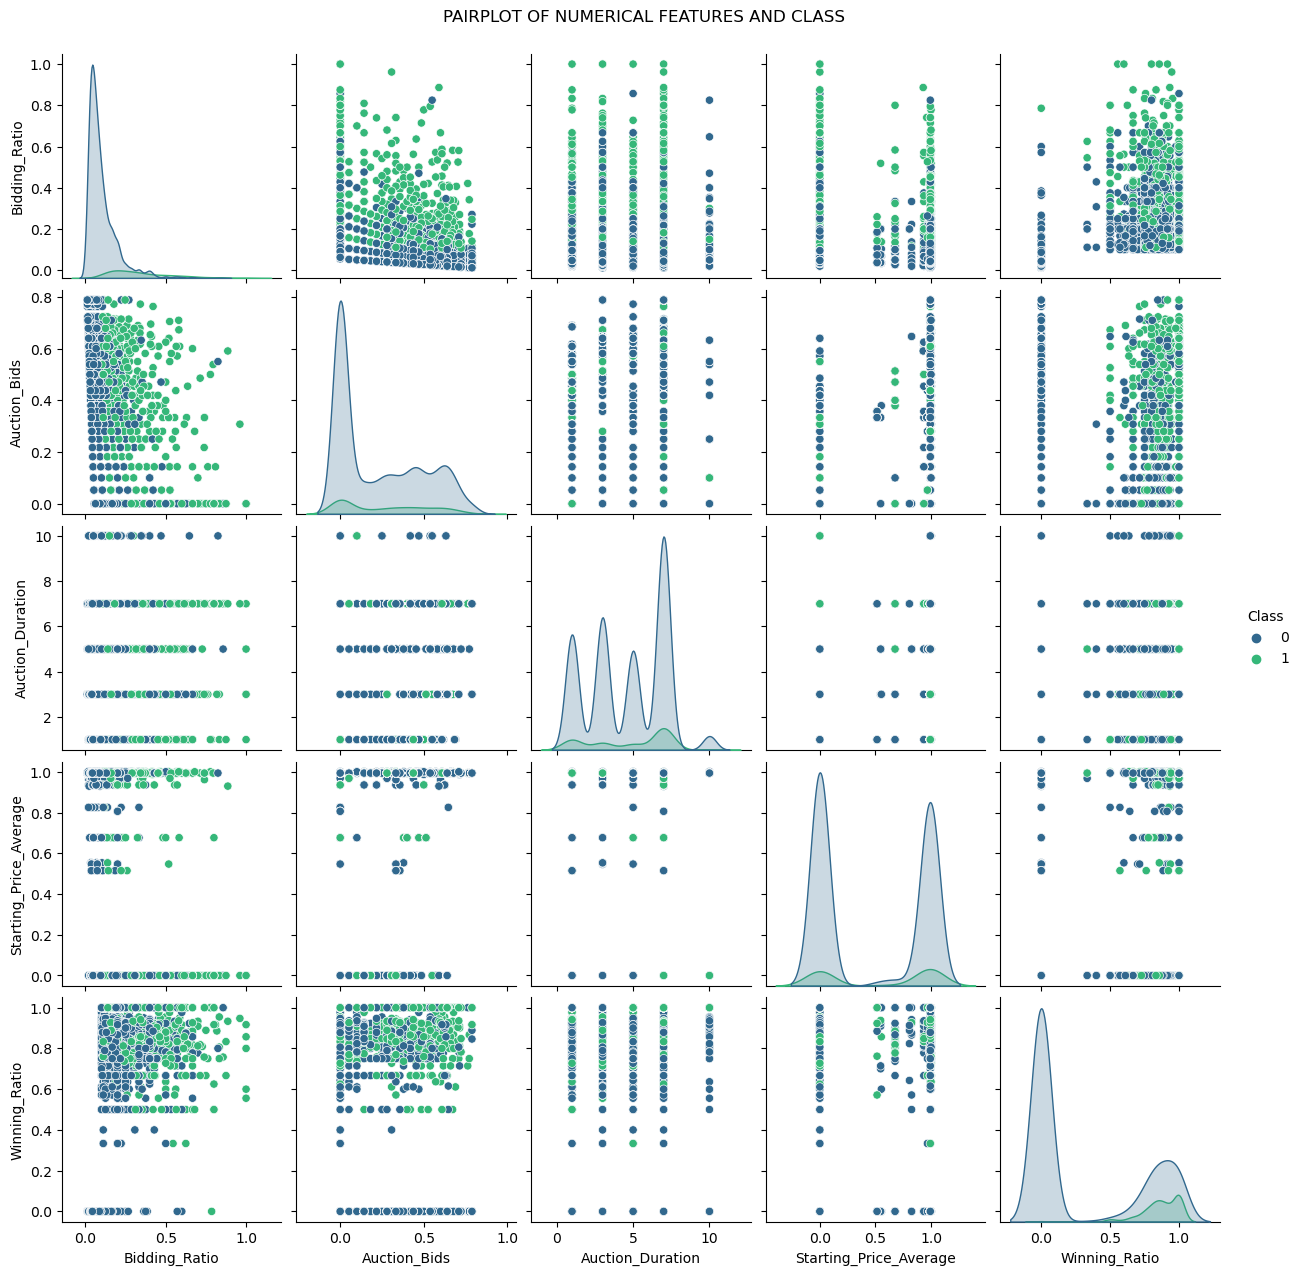

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(Bidding[['Bidding_Ratio', 'Auction_Bids', 'Auction_Duration', 'Starting_Price_Average', 'Winning_Ratio', 'Class']], hue='Class', diag_kind='kde', palette='viridis')

plt.suptitle('PAIRPLOT OF NUMERICAL FEATURES AND CLASS', y=1.02)
plt.show()

### **Dropping variables and splitting the data 70/30 into training and test datasets:**

We decided to drop the variables Record_ID, Auction_ID, and Bidder_ID because they are unique identifiers that do not provide any meaningful patterns or insights for predicting shill bidding behavior.

In [ ]:
from sklearn.model_selection import train_test_split

X = Bidding.drop(columns=['Class', 'Record_ID', 'Auction_ID', 'Bidder_ID'])
y = Bidding['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (4424, 9)
Test data shape: (1897, 9)


In [ ]:
X_train.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
2659,0.086957,0.129032,0.0,0.824028,0.419355,0.993528,0.824028,0.941176,3
2072,0.015873,0.200000,0.0,0.000160,0.000000,0.000000,0.000160,0.809524,7
3858,0.166667,0.047619,0.0,0.675622,0.142857,0.993593,0.675622,0.000000,7
1040,0.043478,0.018519,0.0,0.009790,0.666667,0.999935,0.009790,0.000000,7
2032,0.142857,0.400000,0.0,0.013057,0.000000,0.000000,0.012971,0.875000,7


In [ ]:
X_train.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.142318,0.127372,0.103865,0.464277,0.232021,0.470506,0.432717,0.368723,4.632685
std,0.196427,0.132224,0.279701,0.379981,0.257106,0.490115,0.380741,0.437033,2.462200
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.027027,0.043478,0.000000,0.048256,0.000000,0.000000,0.028531,0.000000,3.000000
50%,0.062996,0.083333,0.000000,0.439482,0.142857,0.000000,0.364091,0.000000,5.000000
75%,0.166667,0.166667,0.000000,0.863796,0.454545,0.993593,0.830468,0.853175,7.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000


### **BUILDING THE MODELS**

#### **Logistic Regression Model:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("LOGISTIC REGRESSION CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_logreg))
print(f"Logistic Regression ROC AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]):.4f}")

LOGISTIC REGRESSION CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1694
           1       0.91      0.90      0.90       203

    accuracy                           0.98      1897
   macro avg       0.95      0.95      0.95      1897
weighted avg       0.98      0.98      0.98      1897

Logistic Regression ROC AUC: 0.9963


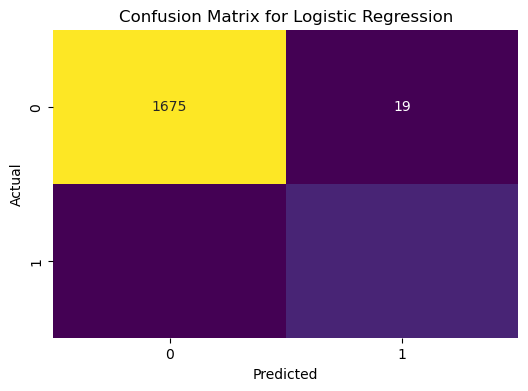

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression Confusion Matrix
y_pred_logreg = logreg.predict(X_test)
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')

#### **kNN Model:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {'n_neighbors': list(range(1, 31))}

# Finding the best k based on ROC AUC

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal k found: {best_k}")


# Trainning the kNN model with the best k

knn_opt = KNeighborsClassifier(n_neighbors=best_k)
knn_opt.fit(X_train, y_train)

y_pred_knn = knn_opt.predict(X_test)

print("kNN CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_knn))
print(f"kNN ROC AUC: {roc_auc_score(y_test, knn_opt.predict_proba(X_test)[:, 1]):.4f}")

Optimal k found: 5
kNN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694
           1       0.99      0.98      0.98       203

    accuracy                           1.00      1897
   macro avg       0.99      0.99      0.99      1897
weighted avg       1.00      1.00      1.00      1897

kNN ROC AUC: 0.9922


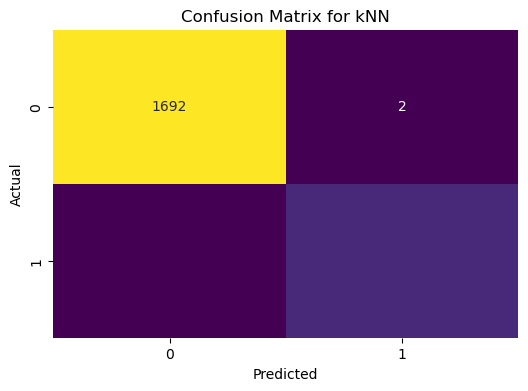

In [ ]:
# kNN Confusion Matrix
y_pred_knn = knn_opt.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, 'kNN')

#### **Random Forest Model:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("RANDOM FOREST CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest ROC AUC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.4f}")

RANDOM FOREST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1694
           1       0.96      0.99      0.97       203

    accuracy                           0.99      1897
   macro avg       0.98      0.99      0.99      1897
weighted avg       0.99      0.99      0.99      1897

Random Forest ROC AUC: 0.9996


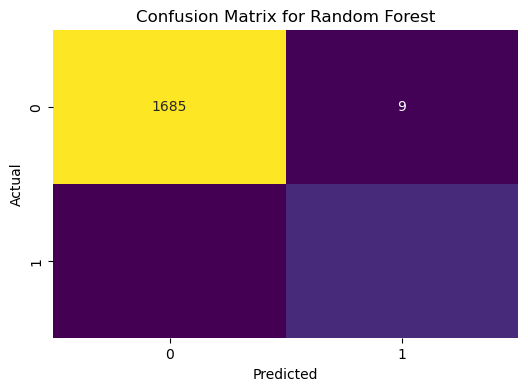

In [ ]:
# Random Forest Confusion Matrix
y_pred_rf = rf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

#### **Boosted Tree Model (Gradient Boosting):**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("BOOSTED TREE CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_gb))
print(f"Boosted Tree ROC AUC: {roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]):.4f}")

BOOSTED TREE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694
           1       0.98      0.99      0.99       203

    accuracy                           1.00      1897
   macro avg       0.99      0.99      0.99      1897
weighted avg       1.00      1.00      1.00      1897

Boosted Tree ROC AUC: 0.9998


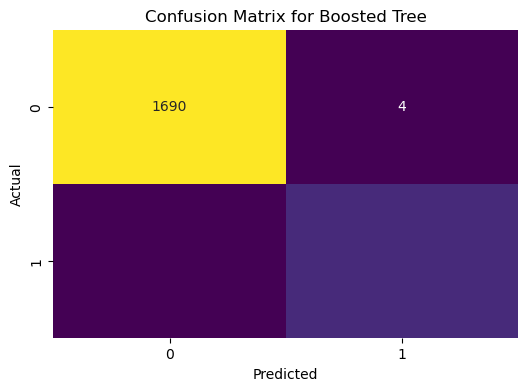

In [ ]:
# Boosted Tree Confusion Matrix
y_pred_gb = gb.predict(X_test)
plot_confusion_matrix(y_test, y_pred_gb, 'Boosted Tree')

#### **Naive Bayes Model:**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("NAIVE BAYES CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_nb))
print(f"Naive Bayes ROC AUC: {roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1]):.4f}")

NAIVE BAYES CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1694
           1       0.78      1.00      0.88       203

    accuracy                           0.97      1897
   macro avg       0.89      0.98      0.93      1897
weighted avg       0.98      0.97      0.97      1897

Naive Bayes ROC AUC: 0.9957


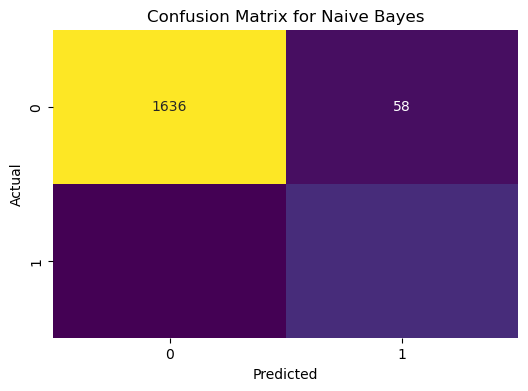

In [ ]:
# Naive Bayes Confusion Matrix
y_pred_nb = nb.predict(X_test)
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')

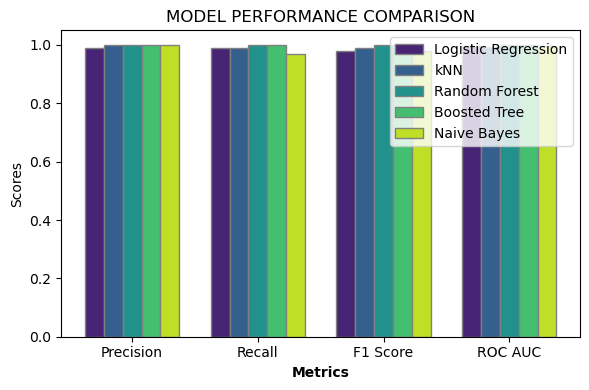

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

#Comparison

metrics = ['Precision', 'Recall', 'F1 Score', 'ROC AUC']
models = ['Logistic Regression', 'kNN', 'Random Forest', 'Boosted Tree', 'Naive Bayes']

logistic_regression = [0.99, 0.99, 0.98, 0.9963]
knn = [1.00, 0.99, 0.99, 0.9922]
random_forest = [1.00, 1.00, 1.00, 0.9996]
boosted_tree = [1.00, 1.00, 1.00, 0.9998]
naive_bayes = [1.00, 0.97, 0.98, 0.9957]

model_scores = np.array([logistic_regression, knn, random_forest, boosted_tree, naive_bayes])

barWidth = 0.15
r1 = np.arange(len(metrics))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(6, 4))
viridis = plt.get_cmap('viridis')
plt.bar(r1, logistic_regression, color=viridis(0.1), width=barWidth, edgecolor='grey', label='Logistic Regression')
plt.bar(r2, knn, color=viridis(0.3), width=barWidth, edgecolor='grey', label='kNN')
plt.bar(r3, random_forest, color=viridis(0.5), width=barWidth, edgecolor='grey', label='Random Forest')
plt.bar(r4, boosted_tree, color=viridis(0.7), width=barWidth, edgecolor='grey', label='Boosted Tree')
plt.bar(r5, naive_bayes, color=viridis(0.9), width=barWidth, edgecolor='grey', label='Naive Bayes')

plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(metrics))], metrics)
plt.ylabel('Scores')
plt.title('MODEL PERFORMANCE COMPARISON')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
roc_auc_scores = {
    'Model': ['Logistic Regression', 'kNN', 'Random Forest', 'Boosted Tree', 'Naive Bayes'],
    'ROC AUC Score': [
        roc_auc_logreg,
        roc_auc_knn,
        roc_auc_rf,
        roc_auc_gb,
        roc_auc_nb
    ]
}

roc_auc_df = pd.DataFrame(roc_auc_scores)
roc_auc_df.style.set_caption("ROC AUC SCORES FOR EACH MODEL").format({'ROC AUC Score': "{:.4f}"})

,Model,ROC AUC Score
0,Logistic Regression,0.9963
1,kNN,0.9922
2,Random Forest,0.9996
3,Boosted Tree,0.9998
4,Naive Bayes,0.9957


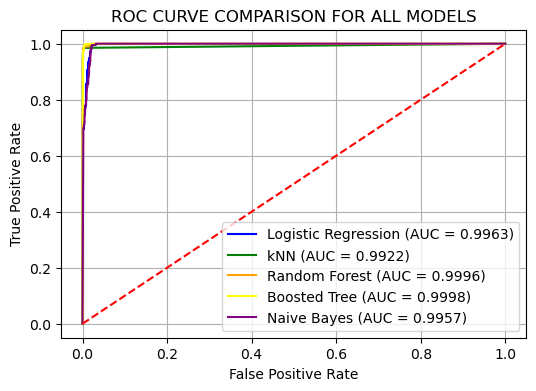

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(6, 4))

# Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_logreg:.4f})')

# kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_opt.predict_proba(X_test)[:, 1])
roc_auc_knn = roc_auc_score(y_test, knn_opt.predict_proba(X_test)[:, 1])
plt.plot(fpr_knn, tpr_knn, color='green', label=f'kNN (AUC = {roc_auc_knn:.4f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, color='orange', label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# Boosted Tree
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])
roc_auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])
plt.plot(fpr_gb, tpr_gb, color='yellow', label=f'Boosted Tree (AUC = {roc_auc_gb:.4f})')

# Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
roc_auc_nb = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
plt.plot(fpr_nb, tpr_nb, color='purple', label=f'Naive Bayes (AUC = {roc_auc_nb:.4f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC CURVE COMPARISON FOR ALL MODELS')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### **BEST MODEL**

In evaluating the performance of all the models we used several important metrics including Recall, Precision, F1-score and ROC AUC. The ROC AUC is particularly useful because it gives a good indication of how well a model can distinguish between the two classes (normal and shill bidders). A higher ROC AUC means the model is better at classifying the data.

**- Logistic Regression:** It performed well with a ROC AUC of 0.9963 and it had a good balance between precision and recall, but its F1-score for predicting shill bidders (class 1) was slightly lower than other models.

**- kNN:** It also did well with a ROC AUC of 0.9922, it performed strongly in both precision and recall, especially for class 1, making it a solid choice. However, it did not quite match the best models in terms of overall performance.

**- Random Forest and Boosted Tree:** They stood out with the highest ROC AUC scores of 0.9996 and 0.9998 respectively. Both models performed exceptionally well across all metrics, with excellent precision, recall, and F1-scores for class 1.

**- Naive Bayes:** Though still a good model, it had a lower precision (0.78) for class 1, despite a high recall (1.00). Its ROC AUC of 0.9957 was solid, but overall, its performance was less balanced compared to the top models.

While both Random Forest and Boosted Tree achieved the same ROC AUC of 0.999, the Boosted Tree model slightly outperformed Random Forest in terms of F1-score and precision for class 1, which is the most important class in this scenario.
**This makes Boosted Tree the best model as it offers both the highest ROC AUC and the best balance between precision and recall for identifying shill bidders.**